In [1]:
import pandas as pd

wide1 = pd.read_csv('wide1.csv')
wide1.head()

,SUBJECT_ID,drug_217_1,condition_1922_1,condition_785_1,drug_49_1,measurement_132_1,condition_1561_1,observation_182_1,condition_2391_1,condition_175_1,...,measurement_343_3,measurement_658_3,measurement_725_3,measurement_1159_3,measurement_870_3,measurement_71_3,measurement_1066_3,measurement_923_3,measurement_1081_3,measurement_15_3
0,1,0.0,0.000778,0.004665,0.005623,0.010544,0.010651,0.010820,0.012317,0.032821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.800448,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
wide_filtered = wide1.loc[:, ~wide1.columns.str.contains('measurement')]

In [3]:
normalized_data = wide_filtered.copy()

for column in normalized_data.columns:
    if column not in ['SUBJECT_ID', 'death']:
        normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / (normalized_data[column].max() - normalized_data[column].min())

normalized_data.head()

,SUBJECT_ID,drug_217_1,condition_1922_1,condition_785_1,drug_49_1,condition_1561_1,observation_182_1,condition_2391_1,condition_175_1,procedure_211_1,...,drug_100_2,drug_239_2,drug_109_2,drug_370_2,drug_337_2,drug_354_2,drug_221_2,drug_38_2,drug_323_2,drug_29_2
0,1,0.0,0.000781,0.004718,0.005627,0.010659,0.010820,0.012319,0.033243,0.036615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.000000,0.000000,0.000000,0.000000,0.800448,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
normalized_data["death"].head()

0    0
1    1
2    0
3    1
4    0
Name: death, dtype: int64

In [5]:
# Performing the sanity check for SUBJECT_ID 2
subject_row = normalized_data[normalized_data["SUBJECT_ID"] == 2]

columns_with_value_1 = [column for column in subject_row.columns if subject_row.iloc[0][column] == 1]
columns_with_value_1

['death', 'procedure_380_1']

In [6]:
death_counts = normalized_data['death'].value_counts()
death_counts

death
0    464
1    263
Name: count, dtype: int64

ROC AUC Score: 0.7438473696093926


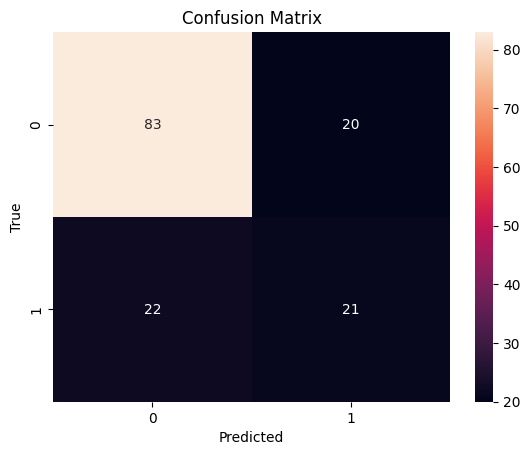

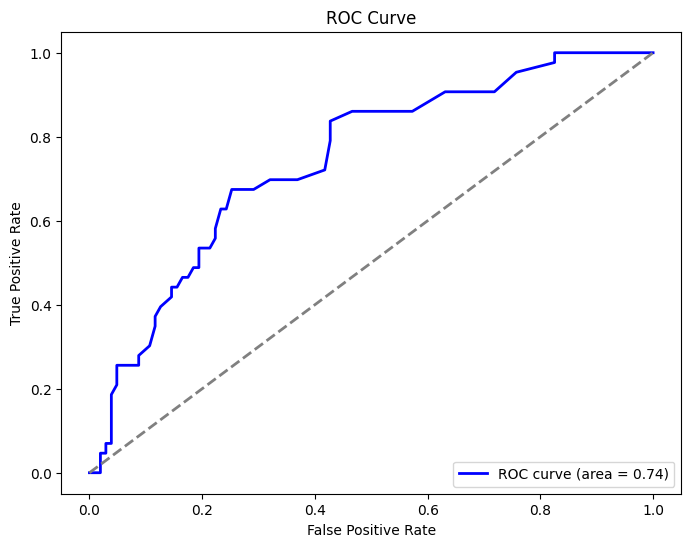

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
from imblearn.over_sampling import SMOTE

features = normalized_data.drop(columns=['death', 'SUBJECT_ID'], axis=1)
labels = normalized_data['death']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()